<a href="https://colab.research.google.com/github/timlok123/PHYS3151-Machine-Learning-in-Physics-2025/blob/main/feedforward-neural-network/feedforward_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward Neural Network (FNN)

In [1]:
! git clone https://github.com/timlok123/PHYS3151-Machine-Learning-in-Physics-2025.git

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2025'...
remote: Enumerating objects: 273, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 273 (delta 16), reused 5 (delta 2), pack-reused 239 (from 1)
Receiving objects: 100% (273/273), 47.28 MiB | 14.23 MiB/s, done.
Resolving deltas: 100% (123/123), done.
Updating files: 100% (62/62), done.


In [2]:
! unzip "/content/PHYS3151-Machine-Learning-in-Physics-2025/feedforward-neural-network/zipped_csv_for_feedforward_neural_network.zip" -d "/content/"

Archive:  /content/PHYS3151-Machine-Learning-in-Physics-2025/feedforward-neural-network/zipped_csv_for_feedforward_neural_network.zip
  inflating: /content/feedforward-neural-network-example-1.csv  
  inflating: /content/feedforward-neural-network-example-2.csv  


## Single Layer Perceptron (No hidden layer)

In [3]:
import pandas as pd
import numpy as np
import scipy.sparse
from pandas import DataFrame

In [4]:
df = pd.read_csv("/content/feedforward-neural-network-example-1.csv", sep=",")
pd.set_option('display.max_columns', None)
print(df)

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  1x11  1x12  \
0          5    0    0    0    0    0    0    0    0    0     0     0     0   
1          0    0    0    0    0    0    0    0    0    0     0     0     0   
2          4    0    0    0    0    0    0    0    0    0     0     0     0   
3          1    0    0    0    0    0    0    0    0    0     0     0     0   
4          9    0    0    0    0    0    0    0    0    0     0     0     0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
59995      8    0    0    0    0    0    0    0    0    0     0     0     0   
59996      3    0    0    0    0    0    0    0    0    0     0     0     0   
59997      5    0    0    0    0    0    0    0    0    0     0     0     0   
59998      6    0    0    0    0    0    0    0    0    0     0     0     0   
59999      8    0    0    0    0    0    0    0    0    0     0     0     0   

       1x13  1x14  1x15  1x16  1x17  1x18  1x19  1x

In [5]:
X = df.drop(columns = 'label')
y = df['label']
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64


A perceptron in this case is simply a feed-forward neural network with no hidden layers. This is equivalent to a multivariate logistic regression, or a Softmax regression.

In [6]:
def computecost(theta,X,y,alpha):
    m = X.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(X,theta) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    cost = (-1 / m) * np.sum(y_mat * np.log(prob)) + (alpha/2)*np.sum(theta*theta) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(X.T,(y_mat - prob)) + alpha*theta #And compute the gradient for that loss
    return cost,grad

In [7]:
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

In [8]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [9]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,theta))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [10]:
theta = np.zeros([X.shape[1],len(np.unique(y))])
print(theta.shape)
iterations = 100
learningRate = 1e-5
losses = []

def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost,grad = computecost(theta,X,y,alpha)
        theta = theta - (learningRate * grad)
        cost_history[it]  = cost

    return theta, cost_history

(784, 10)


In [11]:
theta,cost_history = gradient_descent(X,y,theta,learningRate,iterations)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

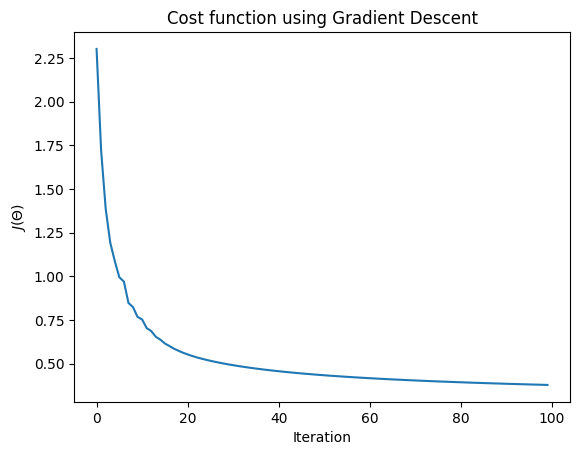

In [12]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
#plt.yscale("log")
plt.title("Cost function using Gradient Descent")

In [13]:
print(theta)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
np.savetxt("theta.csv", theta, delimiter=",")

### Testing the fit

In [15]:
import pandas as pd
import numpy as np
import scipy.sparse
from pandas import DataFrame

In [16]:
df = pd.read_csv("/content/feedforward-neural-network-example-2.csv", sep=",")
pd.set_option('display.max_columns', None)

print(df)

      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  1x11  1x12  \
0         7    0    0    0    0    0    0    0    0    0     0     0     0   
1         2    0    0    0    0    0    0    0    0    0     0     0     0   
2         1    0    0    0    0    0    0    0    0    0     0     0     0   
3         0    0    0    0    0    0    0    0    0    0     0     0     0   
4         4    0    0    0    0    0    0    0    0    0     0     0     0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
9995      2    0    0    0    0    0    0    0    0    0     0     0     0   
9996      3    0    0    0    0    0    0    0    0    0     0     0     0   
9997      4    0    0    0    0    0    0    0    0    0     0     0     0   
9998      5    0    0    0    0    0    0    0    0    0     0     0     0   
9999      6    0    0    0    0    0    0    0    0    0     0     0     0   

      1x13  1x14  1x15  1x16  1x17  1x18  1x19  1x20  1x21  1x2

In [17]:
X = df.drop(columns = 'label')
y = df['label']

In [18]:
prob,pred=getProbsAndPreds(X)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,pred)

In [20]:
print('The accuracy of this model is:', 100*accuracy,'%')

The accuracy of this model is: 90.38000000000001 %


## Single Hidden Layer (Multiple Layer Perceptron)

Here, we will use the torch package to make our single hidden layer neural network.

In [21]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [22]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())
print(train_dataset)
print(test_dataset)

100%|██████████| 9.91M/9.91M [00:00<00:00, 34.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.15MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.74MB/s]

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


Now we make the dataset iterable.

In [23]:
batch_size = 60000
n_iters = 100
#num_epochs = n_iters / (len(train_dataset) / batch_size)
#num_epochs = int(num_epochs)
num_epochs=100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Then we define what kind of neural network we want to set up. Here it is a feedforward neural network.

In [24]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Output layer, 10 units - one for each digit
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

Our images are 28x28 pixels, so our input dimensions is 784 dimensions. We will have a hidden layer of 200 hidden neurons. And our output will be 10, because there are 0-9 digits

In [25]:
input_dim = 28*28
hidden_dim = 200
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

In [26]:
model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)

FeedforwardNeuralNetModel(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)

We will use cross entropy loss because this is the most appropriate loss function for logistic/softmax regression.

In [27]:
criterion = nn.CrossEntropyLoss()

We will use the SGD optimizer defined within the torch package.

In [28]:
learning_rate = 0.2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
iter = 0
accuracy_history = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 1 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                images = images.view(-1, 28 * 28).requires_grad_().to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Making use of the GPU
                '''
                if torch.cuda.is_available():
                    correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()
                else:
                    correct += (predicted == labels).sum()
                '''
                correct += (predicted == labels).sum()

            accuracy = 100. * correct.item() / total
            accuracy_history.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 1. Loss: 2.327105760574341. Accuracy: 12.93
Iteration: 2. Loss: 2.2912650108337402. Accuracy: 13.2
Iteration: 3. Loss: 2.2854855060577393. Accuracy: 14.08
Iteration: 4. Loss: 2.2800137996673584. Accuracy: 15.26
Iteration: 5. Loss: 2.2745280265808105. Accuracy: 17.04
Iteration: 6. Loss: 2.2690179347991943. Accuracy: 19.43
Iteration: 7. Loss: 2.2634739875793457. Accuracy: 22.16
Iteration: 8. Loss: 2.2578868865966797. Accuracy: 25.13
Iteration: 9. Loss: 2.252246856689453. Accuracy: 28.46
Iteration: 10. Loss: 2.2465455532073975. Accuracy: 31.66
Iteration: 11. Loss: 2.2407729625701904. Accuracy: 34.74
Iteration: 12. Loss: 2.2349209785461426. Accuracy: 37.51
Iteration: 13. Loss: 2.228980779647827. Accuracy: 40.14
Iteration: 14. Loss: 2.2229437828063965. Accuracy: 42.71
Iteration: 15. Loss: 2.2168006896972656. Accuracy: 44.76
Iteration: 16. Loss: 2.2105441093444824. Accuracy: 46.48
Iteration: 17. Loss: 2.204164505004883. Accuracy: 48.21
Iteration: 18. Loss: 2.1976547241210938. Accu

Below is a  plot of Accuracy vs Iteration.

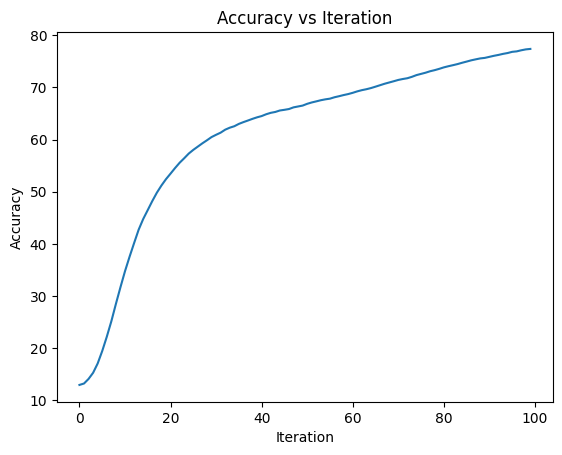

In [30]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
s = interpolate.InterpolatedUnivariateSpline(range(len(accuracy_history)), accuracy_history)
xnew = np.arange(0, 100, 1)
ynew=s(xnew)
#plt.figure()
plt.plot(xnew, ynew)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Iteration')
plt.show()
#plt.plot(accuracy_history)
#plt.xlabel("Iteration")
#plt.ylabel("Accuracy")
#plt.title("Accuracy vs Iteration")

As you can see, the accuracy is not really high. We will use a different method by splitting the dataset into batches, and iterating through the dataset.

In [31]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


batch_size = 600
n_iters = 1000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


input_dim = 28*28
hidden_dim = 200
output_dim = 10

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out



model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
accuracy_history = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                images = images.view(-1, 28 * 28).requires_grad_().to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                '''
                if torch.cuda.is_available():
                    correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()
                else:
                    correct += (predicted == labels).sum()
                '''
                correct += (predicted == labels).sum()

            accuracy = 100. * correct.item() / total
            accuracy_history.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


10
Iteration: 100. Loss: 1.8899790048599243. Accuracy: 65.08
Iteration: 200. Loss: 1.228376030921936. Accuracy: 77.63
Iteration: 300. Loss: 0.8111510872840881. Accuracy: 82.89
Iteration: 400. Loss: 0.661129891872406. Accuracy: 85.33
Iteration: 500. Loss: 0.630407989025116. Accuracy: 86.82
Iteration: 600. Loss: 0.526639997959137. Accuracy: 87.74
Iteration: 700. Loss: 0.4726782739162445. Accuracy: 88.51
Iteration: 800. Loss: 0.4569460153579712. Accuracy: 89.16
Iteration: 900. Loss: 0.49650338292121887. Accuracy: 89.38
Iteration: 1000. Loss: 0.4163152277469635. Accuracy: 89.61


In [32]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


batch_size = 600
n_iters = 1000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

trainloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

testloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


input_dim = 28*28
hidden_dim = 200
output_dim = 10

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        input_dim = 28*28
        # Linear function
        self.fc1 = nn.Linear(input_dim, 512)
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        #x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(self.sigmoid(self.fc1(x)))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x



model = FeedforwardNeuralNetModel()

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.05

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)




epochs = 50
train_losses = []
test_losses = []
min_loss = np.inf

for i in range(epochs):
    train_loss = 0
    train_acc = 0
    test_loss = 0
    test_acc = 0

    # Training step
    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model.forward(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(top_class.shape)
        acc = torch.mean(equals.type(torch.FloatTensor))
        train_acc += acc.item()

    # Validation Step
    with torch.no_grad():
        model.eval()

        for images, labels in testloader:
            log_ps = model.forward(images)
            test_loss += criterion(log_ps, labels).item()
            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(top_class.shape)
            test_acc += torch.mean(equals.type(torch.FloatTensor)).item()

    train_losses.append(train_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print("Epoch:",i+1,
          "Train loss:",train_loss/len(trainloader),
          "TrainAcc:",100*train_acc/len(trainloader),
          "Test loss:",test_loss/len(testloader),
          "Test Acc:",100*test_acc/len(testloader))

Epoch: 1 Train loss: 2.215069749355316 TrainAcc: 23.886666551232338 Test loss: 2.08901084170622 Test Acc: 47.89215711986317
Epoch: 2 Train loss: 1.964969345331192 TrainAcc: 47.83333319425583 Test loss: 1.7692367609809427 Test Acc: 68.68627386934617
Epoch: 3 Train loss: 1.6222225630283356 TrainAcc: 61.37833309173584 Test loss: 1.3955662250518799 Test Acc: 76.09803922036114
Epoch: 4 Train loss: 1.295740350484848 TrainAcc: 69.33666670322418 Test loss: 1.1049815205966724 Test Acc: 79.48529404752395
Epoch: 5 Train loss: 1.060391947031021 TrainAcc: 74.40833348035812 Test loss: 0.910136061556199 Test Acc: 80.99509793169358
Epoch: 6 Train loss: 0.9060429626703262 TrainAcc: 77.24000000953674 Test loss: 0.7795717856463265 Test Acc: 83.31372492453632
Epoch: 7 Train loss: 0.7998033261299133 TrainAcc: 79.08666694164276 Test loss: 0.691679935244953 Test Acc: 84.50980396831737
Epoch: 8 Train loss: 0.7255294489860534 TrainAcc: 80.69833356142044 Test loss: 0.6284648337784935 Test Acc: 85.6029401807224


In [33]:
model.fc1.weight.data

tensor([[-0.0238,  0.0145,  0.0209,  ...,  0.0253,  0.0148, -0.0210],
        [-0.0038,  0.0328,  0.0184,  ...,  0.0154,  0.0026,  0.0012],
        [ 0.0313, -0.0290, -0.0111,  ..., -0.0074,  0.0251,  0.0120],
        ...,
        [ 0.0187,  0.0062,  0.0093,  ..., -0.0107,  0.0124,  0.0310],
        [ 0.0286,  0.0355,  0.0283,  ..., -0.0021, -0.0199, -0.0019],
        [ 0.0141, -0.0268, -0.0327,  ..., -0.0138, -0.0195,  0.0204]])

In [34]:
model.fc2.weight.data

tensor([[ 0.1818, -0.1908, -0.0468,  ...,  0.0754,  0.1573,  0.0467],
        [-0.1434, -0.0733, -0.0154,  ...,  0.0791, -0.0076, -0.2281],
        [-0.1661,  0.0654,  0.0328,  ..., -0.1402, -0.0311,  0.0873],
        ...,
        [ 0.1800,  0.2465, -0.0639,  ...,  0.0763, -0.0351,  0.0815],
        [-0.0493, -0.0188,  0.1471,  ..., -0.1463,  0.1538, -0.0498],
        [ 0.1446,  0.1008, -0.0176,  ..., -0.1571, -0.0710,  0.0254]])

In [35]:
print("The state dict keys: \n\n", model.state_dict().keys())
checkpoint = {'model': FeedforwardNeuralNetModel(), 'state_dict': model.state_dict(), 'optimizer' : optimizer.state_dict()}
torch.save(checkpoint,'FNN1.pth')

The state dict keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


print("The state dict keys: \n\n", model.state_dict().keys())

checkpoint = {'model': FeedforwardNeuralNetModel(),
              'state_dict': model.state_dict(),
              'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, './asset/model/FNN1.pth')

## 3 Hidden Layers

Now we turn our attention to the case of a FNN with 3 hidden layers. The gross format of the code is quite similar to the one with 1 hidden layer, except in the model class, the 2 extra layers are stated. Note, the same batch processing method is used.

In [36]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

batch_size = 600
n_iters = 10000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.Sigmoid()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.Sigmoid()

        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.Sigmoid()

        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)



    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

input_dim = 28*28
hidden_dim = 100
output_dim = 10


model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1


optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
accuracy_history = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()


        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                images = images.view(-1, 28 * 28).requires_grad_().to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100. * correct.item() / total
            accuracy_history.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 100. Loss: 2.3009471893310547. Accuracy: 10.28
Iteration: 200. Loss: 2.3021442890167236. Accuracy: 10.28
Iteration: 300. Loss: 2.305172920227051. Accuracy: 11.35
Iteration: 400. Loss: 2.30399227142334. Accuracy: 12.75
Iteration: 500. Loss: 2.3068699836730957. Accuracy: 19.44
Iteration: 600. Loss: 2.300718069076538. Accuracy: 11.35
Iteration: 700. Loss: 2.2953341007232666. Accuracy: 11.35
Iteration: 800. Loss: 2.3034884929656982. Accuracy: 10.32
Iteration: 900. Loss: 2.2990472316741943. Accuracy: 11.35
Iteration: 1000. Loss: 2.299947500228882. Accuracy: 11.35
Iteration: 1100. Loss: 2.3005454540252686. Accuracy: 11.35
Iteration: 1200. Loss: 2.299484968185425. Accuracy: 11.35
Iteration: 1300. Loss: 2.29581356048584. Accuracy: 11.35
Iteration: 1400. Loss: 2.3061630725860596. Accuracy: 11.35
Iteration: 1500. Loss: 2.303034782409668. Accuracy: 10.28
Iteration: 1600. Loss: 2.298891067504883. Accuracy: 11.35
Iteration: 1700. Loss: 2.2953941822052. Accuracy: 11.35
Iteration: 1800. Lo

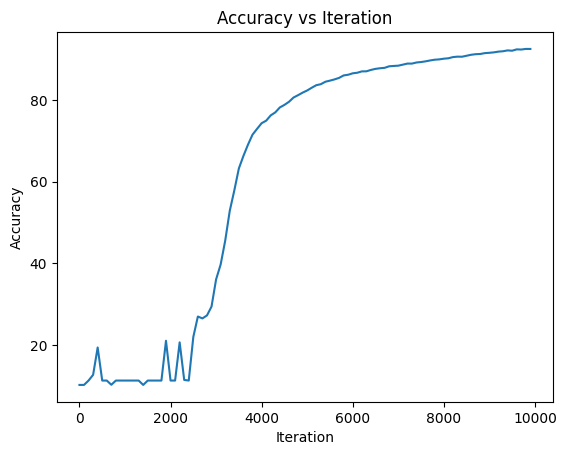

In [37]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
s = interpolate.InterpolatedUnivariateSpline(range(len(accuracy_history)), accuracy_history)
xnew = np.arange(0, 100, 1)
ynew=s(xnew)

plt.plot(100*xnew, ynew)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Iteration')
plt.show()